In [14]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [15]:
train_data_path = "/kaggle/input/breast-cancer-data/dataset/train"
validation_data_path = "/kaggle/input/breast-cancer-data/dataset/validation"

In [16]:
def plotimages(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes=axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [17]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")


training_data = training_datagen.flow_from_directory(train_data_path,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode="binary")

Found 200 images belonging to 2 classes.


In [18]:
training_data.class_indices

{'cancer': 0, 'healthy': 1}

In [19]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode = "binary")

Found 55 images belonging to 2 classes.


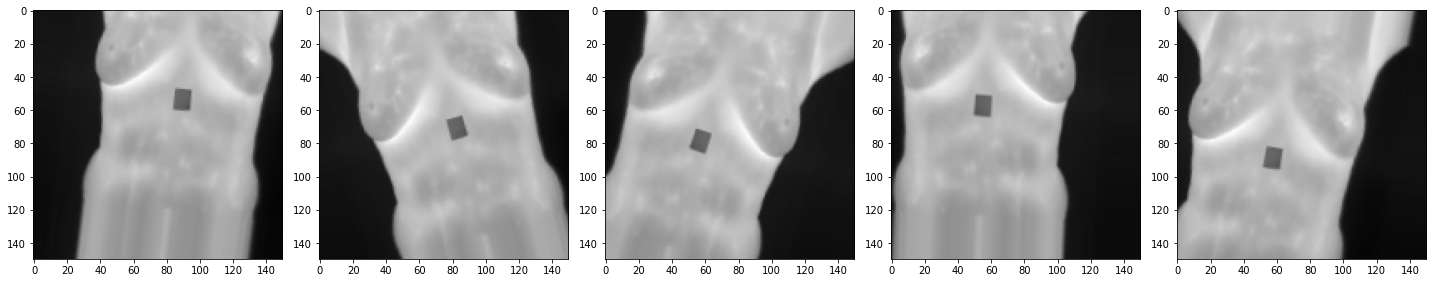

In [20]:
images = [training_data[0][0][0] for i in range(5)]
plotimages(images)

In [21]:
model_path = "./skin_disease_model.h5"
checkpoint = ModelCheckpoint(model_path, monitor="accuracy", verbose=1, save_best_only=True, mode="max")
callbacks_list = [checkpoint]

In [22]:
cnn_model = tensorflow.keras.models.Sequential([
                                    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3),
                                    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tensorflow.keras.layers.Conv2D(filters=128, kernel_size=3),
                                    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=3),
                                    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                                    tensorflow.keras.layers.Dropout(0.5),
                                    tensorflow.keras.layers.Flatten(),
                                    tensorflow.keras.layers.Dense(units=128, activation="relu"),
                                    tensorflow.keras.layers.Dropout(0.1),
                                    tensorflow.keras.layers.Dense(units=256, activation="relu"),
                                    tensorflow.keras.layers.Dropout(0.25),
                                    tensorflow.keras.layers.Dense(units=38, activation="softmax")
    
])

In [23]:
cnn_model.compile(optimizer= Adam(lr=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [25]:
history = cnn_model.fit(training_data,
                       epochs=500,
                       verbose=1,
                       validation_data= valid_data,
                       callbacks=callbacks_list)

Epoch 1/500
7/7 [==============================] - 3s 391ms/step - loss: 3.1816 - accuracy: 0.3743 - val_loss: 1.2608 - val_accuracy: 0.5455

Epoch 00001: accuracy improved from -inf to 0.45000, saving model to ./skin_disease_model.h5
Epoch 2/500
7/7 [==============================] - 3s 392ms/step - loss: 1.3122 - accuracy: 0.4534 - val_loss: 0.7504 - val_accuracy: 0.4545

Epoch 00002: accuracy did not improve from 0.45000
Epoch 3/500
7/7 [==============================] - 2s 323ms/step - loss: 0.9618 - accuracy: 0.4272 - val_loss: 0.7091 - val_accuracy: 0.4545

Epoch 00003: accuracy did not improve from 0.45000
Epoch 4/500
7/7 [==============================] - 2s 330ms/step - loss: 0.9892 - accuracy: 0.4452 - val_loss: 0.6907 - val_accuracy: 0.5455

Epoch 00004: accuracy improved from 0.45000 to 0.47000, saving model to ./skin_disease_model.h5
Epoch 5/500
7/7 [==============================] - 2s 327ms/step - loss: 0.8655 - accuracy: 0.4178 - val_loss: 0.7280 - val_accuracy: 0.4545
